## algorithm design and anlysis-2025 spring  homework 4
**Deadline**：2025.5.14

**name**:李鑫娟 112024321341957


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1 
**最小生成树（Minimum Spanning Tree）**

设  **G**  为一个带权重的连通无向图，且所有边的权重均不相等。令$e_i$ 为权重第 $i$ 小的边。最小生成树（MST）是否必须包含 $e_1$ ? 同理，是否必须包含 $e_2$ 和 $e_3$ ? 若必须包含，请给出证明；否则，请构造反例。需从基本原理论证，不能依赖割引理(cut lemma) 或 Prim/Kruskal算法的正确性。


### 最小生成树一定包含最小边e1,不一定包含e2和e3
### e1反证：

假设e1不在MST中，那么在MST中存在一条路径连接 e1的两个端点，这条路径的总权重一定大于e1的权重。

将e1加入MST中，会形成一个环。

在这个环中，我们可以找到一条边，其权重大于e1的权重。

移除这条权重较大的边，将e1保留，可以得到一个总权重更小的生成树，这与MST的定义矛盾。

因此，MST必须包含e1。


### e2反例：
图只有两个顶点两条边，且权重不相等，最小生成树只包含最小权重的边e1,不包含e2

### e3反例：
图只有三个顶点三条边，且权重不相等，最小生成树只包含最小权重的边e1和e2，不包含e3

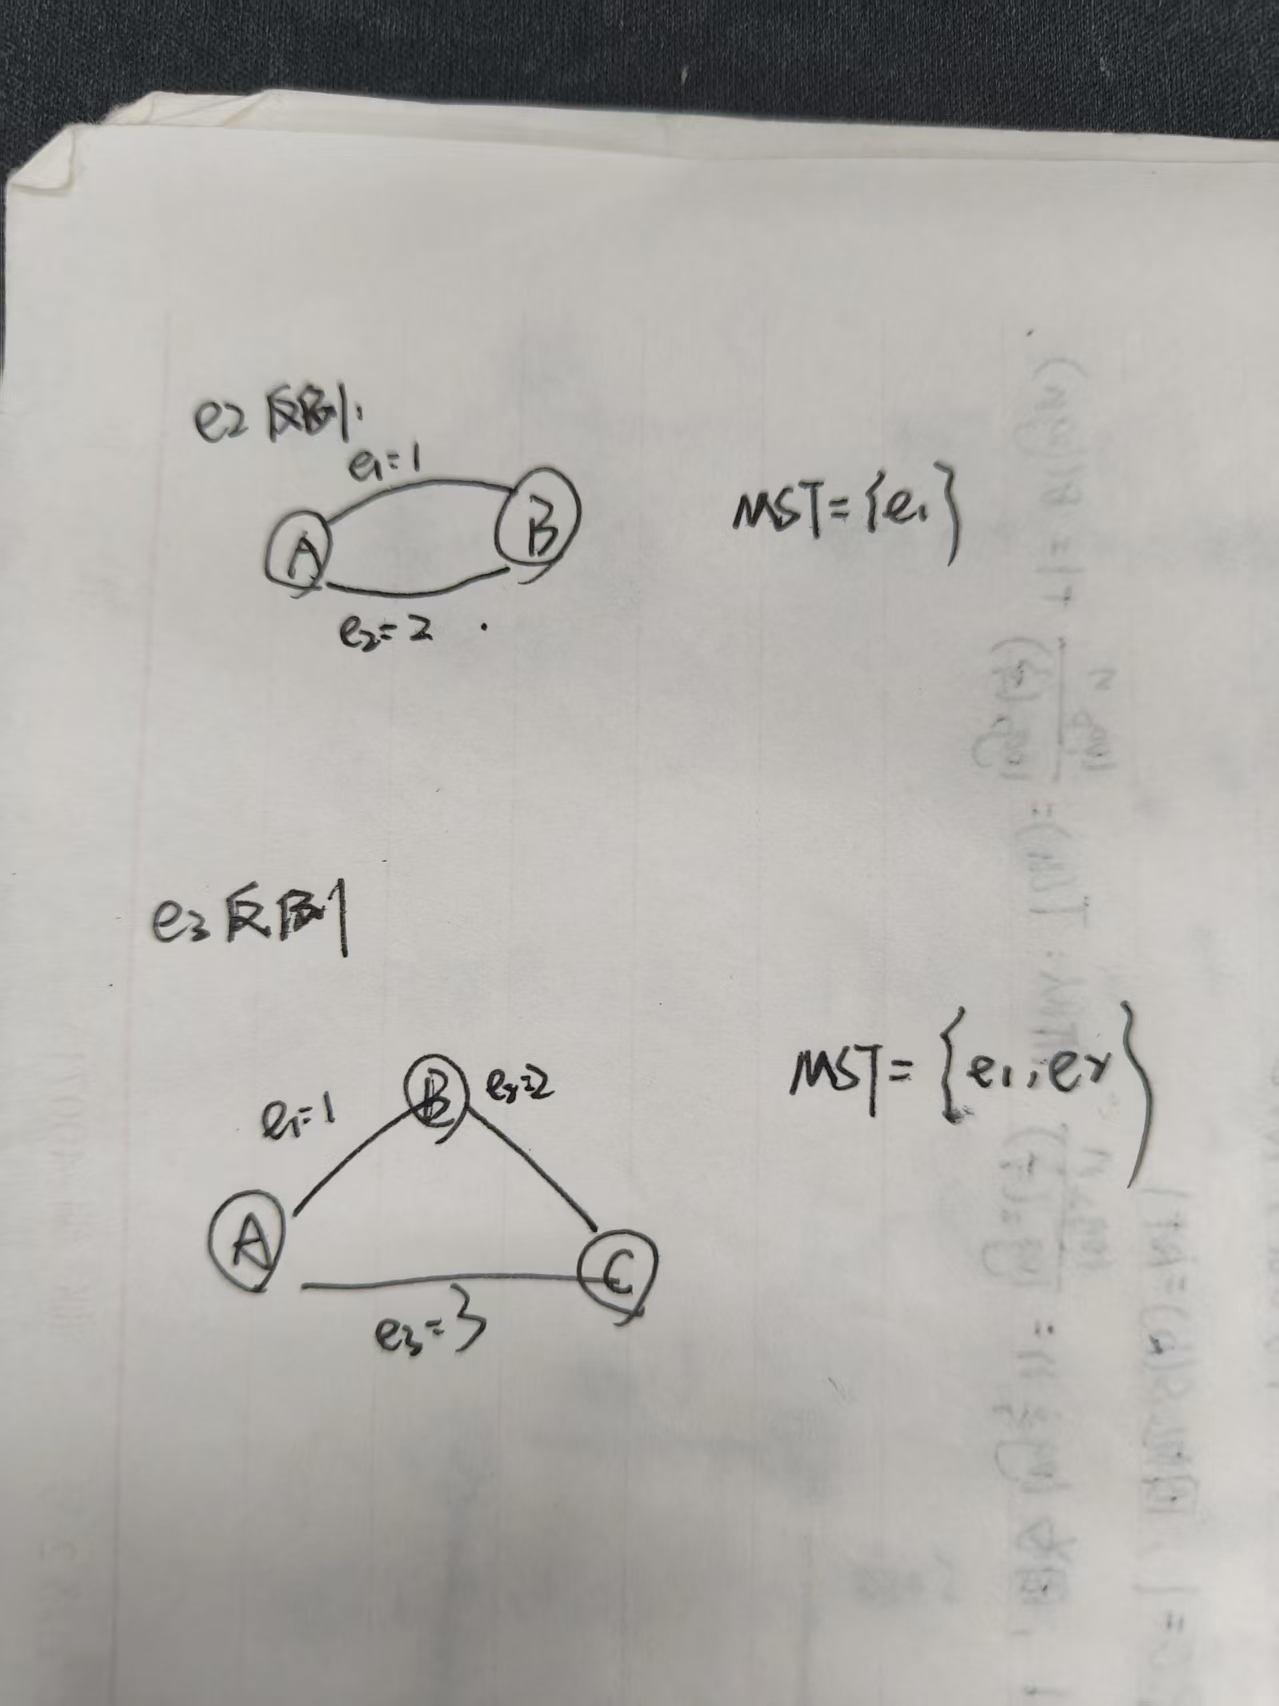

## 问题 2 
**瓶颈生成树（Bottleneck Spanning Tree）**

带有权重的无向图 $G(V,E,w)$ 的瓶颈生成树，表现为：在所有生成树中，最大权重边的权重值最小。即，BST $T$ 最小化瓶颈损失 $c(T)=max_{e \in T}{w(e)}$。

1. 证明 $G$ 的每一个最小生成树（MST）都是瓶颈生成树（BST）
2. 设计一个线性时间复杂度的算法：， 对于一个图 $G(V,E,w)$ 和一个整数 $b$，判断图 $ G$ 是否存在一个瓶颈生成树，其最大权重边的权重不超过 $b$，分析算法设计思路，并基于python编程实现。
3. 设计一个线性时间复杂度的算法：对于给定的图 $G(V,E,w)$，找到其瓶颈生成树，分析算法设计思路，并基于python编程实现。

### 1:证明最小生成树一定是瓶颈生成树
反证法：

假设最小生成树不是瓶颈树，设最小生成树T的最大权边为e，则存在一棵瓶颈树Tb，其所有的边的权值小于w(e)。

删除T中的e，形成两棵数T', T''，用Tb中连接T', T''的边连接这两棵树，得到新的生成树，其权值小于T，与T是最小生成树矛盾。

### 2：是否存在瓶颈生成树
可以使用深度优先搜索（DFS）或广度优先搜索（BFS）来判断图的连通性。
我们只考虑权重不超过b的边，构建一个子图 
>G′=(V,E′)，其中 E′={e∈E∣w(e)≤b}.

如果这个子图是连通的，那么图G存在一个瓶颈生成树，其最大权重边的权重不超过 b；否则不存在。

In [4]:
### 2
### 参考大模型
def is_bottleneck_spanning_tree_possible(graph, b):
    # 构建子图
    sub_graph = defaultdict(list)
    for u, neighbors in graph.items():
        for v, weight in neighbors:
            if weight <= b:
                sub_graph[u].append(v)
                sub_graph[v].append(u)

    # 使用 BFS 检查连通性
    if not sub_graph:
        return False
    start = next(iter(sub_graph))
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        node = queue.popleft()
        for neighbor in sub_graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

    return len(visited) == len(graph)


# 示例图
graph = {
    0: [(1, 2), (2, 4)],
    1: [(0, 2), (2, 1)],
    2: [(0, 4), (1, 1)]
}

b = 2
print(is_bottleneck_spanning_tree_possible(graph, b))

True


### 3:找到瓶颈生成树
首先对所有边按权重从小到大排序。

然后依次加入边，直到图连通，此时最后加入的边的权重就是瓶颈生成树的最大权重边的权重。

可以使用并查集（Union-Find）数据结构来高效地判断加入边后图是否连通


In [5]:
# 3
#参考大模型
from collections import defaultdict, deque
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x != root_y:
            if self.rank[root_x] > self.rank[root_y]:
                self.parent[root_y] = root_x
            elif self.rank[root_x] < self.rank[root_y]:
                self.parent[root_x] = root_y
            else:
                self.parent[root_y] = root_x
                self.rank[root_x] += 1
            return True
        return False


def find_bottleneck_spanning_tree(graph):
    edges = []
    for u, neighbors in graph.items():
        for v, weight in neighbors:
            edges.append((weight, u, v))
    edges.sort()

    n = len(graph)
    uf = UnionFind(n)
    bottleneck = 0
    mst_edges = []

    for weight, u, v in edges:
        if uf.union(u, v):
            mst_edges.append((u, v, weight))
            bottleneck = weight
            if len(mst_edges) == n - 1:
                break

    return mst_edges, bottleneck


# 示例图
graph = {
    0: [(1, 2), (2, 4)],
    1: [(0, 2), (2, 1)],
    2: [(0, 4), (1, 1)]
}

mst_edges, bottleneck = find_bottleneck_spanning_tree(graph)
print("Bottleneck Spanning Tree Edges:", mst_edges)
print("Bottleneck:", bottleneck)

Bottleneck Spanning Tree Edges: [(1, 2, 1), (0, 1, 2)]
Bottleneck: 2


## 问题 3

**道路网（Road Network）**

假设有一个以图 $ G(V, E, l) $ 表示的道路网络，连接了一组城市 $ V $。我们假设该网络是有向的，并且每条道路 $(u, v) \in E$ 都有一个非负的长度 $ l(u, v) $。一条新的道路即将被建造，因此有一个列表 $ E' $ 包含它可以连接的城市对。每对 $(u, v) \in E'$ 都有一个对应的长度 $ l'(u, v) $。我们希望选择一对城市，使得两个城市 $ s, t \in V $ 之间的距离减少最大。请为此问题编写一个高效的算法，并详细解释算法的正确性和复杂度。


### idea
计算原始最短路径：使用 Floyd - Warshall 算法计算在未添加新道路之前，图中任意两个城市之间的最短路径。

Floyd - Warshall 算法的时间复杂度是O(V^3)，可以处理有向图和负权边（虽然本题中边的长度非负），并且能够得到任意两点间的最短路径矩阵。

枚举新道路：对于列表E′中的每一对城市(u,v)，我们尝试将这条新道路加入到图中，然后重新计算s和t之间的最短路径。

这里我们可以利用之前计算好的最短路径矩阵，通过更新s到t的最短路径来考虑新道路的影响。

选择最优道路：记录每一条新道路加入后s到t距离的减少量，选择使距离减少最大的那条新道路。


In [7]:
# 参考大模型
def floyd_warshall(graph, num_vertices):
    # 初始化距离矩阵
    dist = [[float('inf')] * num_vertices for _ in range(num_vertices)]
    for i in range(num_vertices):
        dist[i][i] = 0
    for u in graph:
        for v, length in graph[u]:
            dist[u][v] = length

    # Floyd - Warshall 算法核心
    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist


def select_best_new_road(graph, new_roads, s, t, num_vertices):
    # 计算原始最短路径
    original_dist = floyd_warshall(graph, num_vertices)
    original_distance = original_dist[s][t]

    max_reduction = 0
    best_road = None

    # 枚举新道路
    for (u, v), length in new_roads.items():
        # 临时更新距离矩阵
        new_dist = [row[:] for row in original_dist]
        new_dist[u][v] = min(new_dist[u][v], length)

        # 重新计算所有节点对的最短路径
        for k in range(num_vertices):
            for i in range(num_vertices):
                for j in range(num_vertices):
                    if new_dist[i][k] != float('inf') and new_dist[k][j] != float('inf'):
                        new_dist[i][j] = min(new_dist[i][j], new_dist[i][k] + new_dist[k][j])

        new_distance = new_dist[s][t]
        reduction = original_distance - new_distance

        if reduction > max_reduction:
            max_reduction = reduction
            best_road = (u, v)

    return best_road, max_reduction

# 示例图
graph = {
    0: [(1, 2), (2, 4)],
    1: [(2, 1)],
    2: []
}
new_roads = {
    (0, 2): 1,
    (1, 0): 3
}
s = 0
t = 2
num_vertices = 3

best_road, max_reduction = select_best_new_road(graph, new_roads, s, t, num_vertices)
print(f"Best new road: {best_road}, Maximum reduction: {max_reduction}")

Best new road: (0, 2), Maximum reduction: 2


## 问题 4

**逃离问题**

一个 $ n \times n $ 的网格是一个无向图，由 $ n $ 行和 $ n $ 列的顶点组成，如下图所示。我们用 $(i,j)$ 表示第 $ i $ 行和第 $ j $ 列的顶点。除了边界顶点，网格中的所有顶点都有四个邻居，即满足 $ i = 1, i = n, j = 1 $ 或 $ j = n $ 的点 $(i,j)$。

给定网格中的 $ m \leq n^2 $ 个起点 $(x_1, y_1), (x_2, y_2), \cdots , (x_m, y_m)$，逃离问题是确定是否存在 $ m $ 条顶点不相交的路径（即路径之间不相交），从这些起点到边界上的任意 $ m $ 个不同点。例如，图1中的网格存在逃离。

(1) 该问题可以看作是一个最大流问题。考虑一个流网络，其中顶点和边都有容量。也就是说，进入任何给定顶点的总正流量受到容量限制。证明在具有边和顶点容量的网络中确定最大流可以简化为在具有可比大小的普通流网络上的最大流问题。更准确地说，你需要将一个具有顶点和边容量的网络 $ G = (V,E) $ 转换为另一个仅具有边容量的网络 $ G' = (V', E') $，使得两个网络上的最大流相同，并且你构建的新网络具有 $ V' = O(V) $ 个顶点和 $ E' = O(E) $ 条边。你可以假设网络是连通的。

(2) 描述一个解决逃离问题的高效算法，并分析其运行时间。


<div align="center"> <img alt="图片" src="./fig/escepe-p.png"> </div>
<center> 图2. 逃脱问题网格，起始顶点为黑色，其他网格顶点为白色</center>

参考大模型

### 问题分析

#### (1) 将具有顶点和边容量的网络转换为仅具有边容量的网络

我们需要将一个具有顶点和边容量的网络G = (V, E) 转换为另一个仅具有边容量的网络G' = (V', E')，使得两个网络上的最大流相同，并且新网络的大小与原网络相当。

#### (2) 解决逃离问题的高效算法

我们需要设计一个高效算法来解决逃离问题，并分析其运行时间。

### 解答

#### (1) 转换网络

**转换方法**：
1. **拆分顶点**：
   - 对于每个顶点 $ v \in V  $，将其拆分为两个顶点 $ v_{\text{in}} $ 和 $ v_{\text{out}} $。
   - 在 $ v_{\text{in}} $ 和 $ v_{\text{out}} $ 之间添加一条容量为 $ c(v) $ 的边。
   - 对于每条边 $ (u, v) \in E $，在 $ G' $ 中添加边 $ (u_{\text{out}}, v_{\text{in}}) $，容量为 $ c(u, v) $。

**转换后的网络**：
- 顶点集 $ V' $ 包含 $ 2|V| $ 个顶点。
- 边集 $ E' $ 包含 $ |E| + |V| $ 条边。

**最大流的等价性**：
- 在原网络 $ G $ 中，每个顶点的流量受到其容量的限制。
- 在转换后的网络 $ G' $ 中，每个顶点的流量通过 $ v_{\text{in}} $ 和 $ v_{\text{out}} $ 之间的边来限制。
- 因此，两个网络上的最大流是相同的。

**时间复杂度**：
- 转换过程的时间复杂度为 $ O(|V| + |E|) $。


#### (2) 解决逃离问题的高效算法

**算法描述**：
1. **构建流网络**：
   - 将 $ n \times n $ 网格转换为流网络，每个顶点的容量为1，每条边的容量为1。
   - 添加一个超级源点 $ s $ 和一个超级汇点 $ t $。
   - 从超级源点 $ s $ 到每个起点 $ (x_i, y_i) $ 添加一条容量为1的边。
   - 从每个边界顶点到超级汇点 $ t $ 添加一条容量为1的边。

2. **计算最大流**：
   - 使用最大流算法（如 Ford-Fulkerson 或 Edmonds-Karp）计算从超级源点 $ s $ 到超级汇点 $ t $ 的最大流。

3. **判断是否存在 $ m $ 条不相交的路径**：
   - 如果最大流等于 $ m $，则存在 $ m $ 条不相交的路径。
   - 否则，不存在 $ m $ 条不相交的路径。

**伪代码**：

```python
def escape_problem(grid, start_points):
    n = len(grid)
    m = len(start_points)
    
    # 构建流网络
    G = build_flow_network(grid, start_points)
    
    # 计算最大流
    max_flow = ford_fulkerson(G, s, t)
    
    # 判断是否存在 m 条不相交的路径
    if max_flow == m:
        return True
    else:
        return False

def build_flow_network(grid, start_points):
    n = len(grid)
    m = len(start_points)
    
    G = FlowNetwork()
    
    # 添加超级源点和超级汇点
    s = G.add_vertex("s")
    t = G.add_vertex("t")
    
    # 添加起点到超级源点的边
    for (x, y) in start_points:
        v = G.add_vertex((x, y))
        G.add_edge(s, v, 1)
    
    # 添加网格顶点和边
    for i in range(n):
        for j in range(n):
            v = G.add_vertex((i, j))
            if i > 0:
                G.add_edge((i-1, j), (i, j), 1)
            if i < n-1:
                G.add_edge((i+1, j), (i, j), 1)
            if j > 0:
                G.add_edge((i, j-1), (i, j), 1)
            if j < n-1:
                G.add_edge((i, j+1), (i, j), 1)
    
    # 添加边界顶点到超级汇点的边
    for i in range(n):
        G.add_edge((i, 0), t, 1)
        G.add_edge((i, n-1), t, 1)
        G.add_edge((0, i), t, 1)
        G.add_edge((n-1, i), t, 1)
    
    return G
```

**时间复杂度分析**：
1. **构建流网络**：
   - 时间复杂度为 $ O(n^2) $，因为需要遍历整个网格。
2. **计算最大流**：
   - 使用 Ford-Fulkerson 算法，时间复杂度为 $ O(\text{max\_flow} \cdot |E|) $。
   - 在最坏情况下，最大流为 $ m $，边数 $ |E| $ 为 $ O(n^2) $。
   - 因此，总的时间复杂度为 $ O(m \cdot n^2) $。

### 最终结论

1. **转换网络**：
   - 将具有顶点和边容量的网络 $ G $ 转换为仅具有边容量的网络 $ G' $，使得两个网络上的最大流相同。
   - 转换后的网络 $ G' $ 的大小为 $ O(|V|) $ 个顶点和 $ O(|E|) $ 条边。

2. **解决逃离问题的高效算法**：
   - 构建流网络并计算最大流。
   - 如果最大流等于 $ m $，则存在 $ m $ 条不相交的路径。
   - 算法的时间复杂度为 $ O(m \cdot n^2) $。


